# **GLOBAL TERRORISM ANALYSIS**

### **PART-3: DATA ANALYSIS AND VISUALISATION**


> By Shashwat Dev



This file contains analysis and vizualisation using Python, for viewing some more advanced analysis and visualizations refer to Global Terrorism Analysis Workbook @ my Tableau Public Profile

Importing necessary libraries

In [34]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import animation
pd.options.mode.chained_assignment = None
import seaborn as sns
import plotly.express as px

In [35]:
terror_df = pd.read_csv('BaseForAnalysis.csv', sep=',')

Glimpse of the final dataset that will be used to draw the analysis

In [36]:
terror_df.head(10)

,Unnamed: 0,eventid,year,month,day,approxdate,extended,resolution,country,country.1,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,ncasualties
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,1.0
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,PGIS,0,1,1,1,NaN,0.0
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN
5,5,197001010002,1970,1,1,NaN,0,NaN,217,United States,...,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN,0.0
6,6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,...,NaN,NaN,NaN,PGIS,0,0,0,0,NaN,0.0
7,7,197001020002,1970,1,2,NaN,0,NaN,217,United States,...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN,0.0
8,8,197001020003,1970,1,2,NaN,0,NaN,217,United States,...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN,0.0
9,9,197001030001,1970,1,3,NaN,0,NaN,217,United States,...,Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN,0.0


Columns involved

In [37]:
terror_df.columns

Index(['Unnamed: 0', 'eventid', 'year', 'month', 'day', 'approxdate',
       'extended', 'resolution', 'country', 'country.1',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'ncasualties'],
      dtype='object', length=137)

Analysis of the numerical figures in the data frame

In [38]:
terror_df[['nkilled', 'nkillonlyter', 'nwounded', 'propdamageextent', 
        'ncasualties']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nkilled,171378.0,2.403272,11.545741,0.0,0.0,0.0,2.0,1570.0
nkillonlyter,114733.0,0.508058,4.199937,0.0,0.0,0.0,0.0,500.0
nwounded,165380.0,3.167668,35.949392,0.0,0.0,0.0,2.0,8191.0
ncasualties,164817.0,5.296128,42.069023,0.0,0.0,1.0,4.0,9574.0


In [39]:
terror_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 137 columns):
 #    Column              Dtype  
---   ------              -----  
 0    Unnamed: 0          int64  
 1    eventid             int64  
 2    year                int64  
 3    month               int64  
 4    day                 int64  
 5    approxdate          object 
 6    extended            int64  
 7    resolution          object 
 8    country             int64  
 9    country.1           object 
 10   region              int64  
 11   region.1            object 
 12   provstate           object 
 13   city                object 
 14   latitude            float64
 15   longitude           float64
 16   specificity         float64
 17   vicinity            int64  
 18   location            object 
 19   summary             object 
 20   crit                int64  
 21   crit2               int64  
 22   crit3               int64  
 23   doubtterr           float64
 24 

Analysis of the number of attacks per year

Text(0.5, 1.0, 'Number of Terrorist Attack by Year')

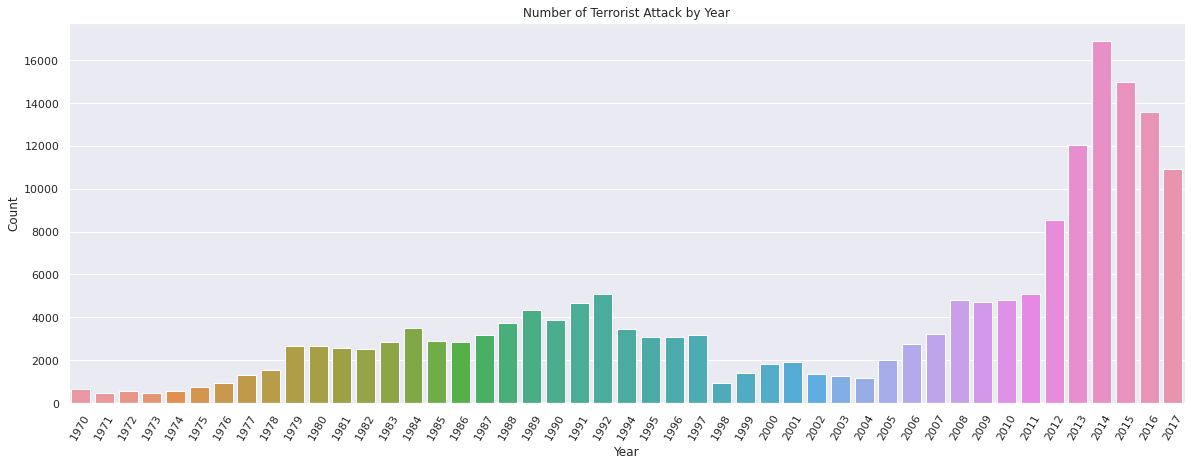

In [40]:
f = plt.figure(figsize=(20, 7))

sns.set(font_scale = 1.1)
sns.set_theme(style = "darkgrid")
xaxis = sns.countplot(x = 'year', data = terror_df)
xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.title('Number of Terrorist Attack by Year', fontsize = 12)

Number of Attacks per Attack Method

Text(0.5, 1.0, 'Types of Terrorist Attack ')

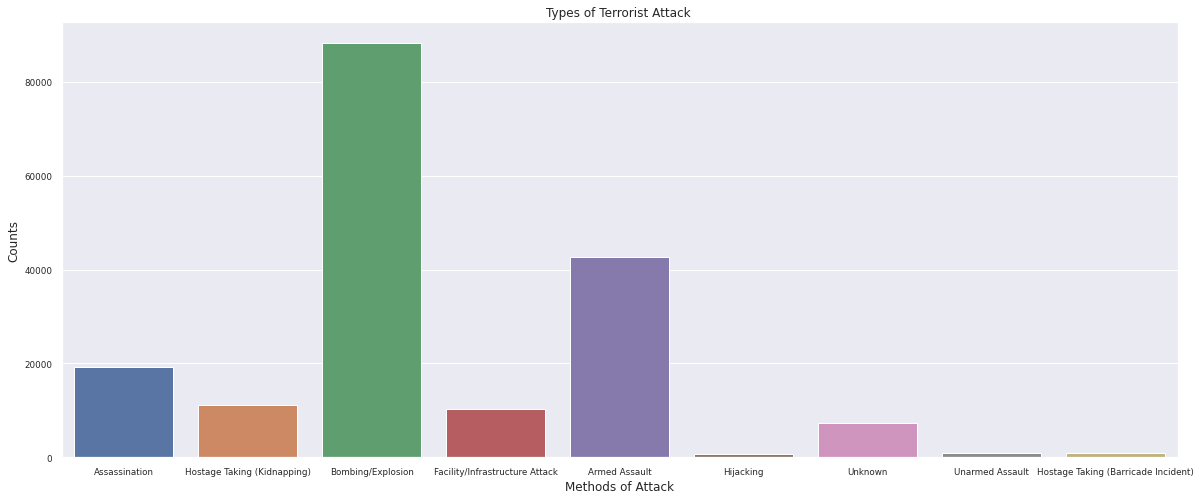

In [41]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
sns.countplot(x='attacktype', data=terror_df,)
plt.xlabel('Methods of Attack', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Types of Terrorist Attack ', fontsize=12)

Number of Attacks per Type of Targets

Text(0.5, 1.0, 'Types of Target')

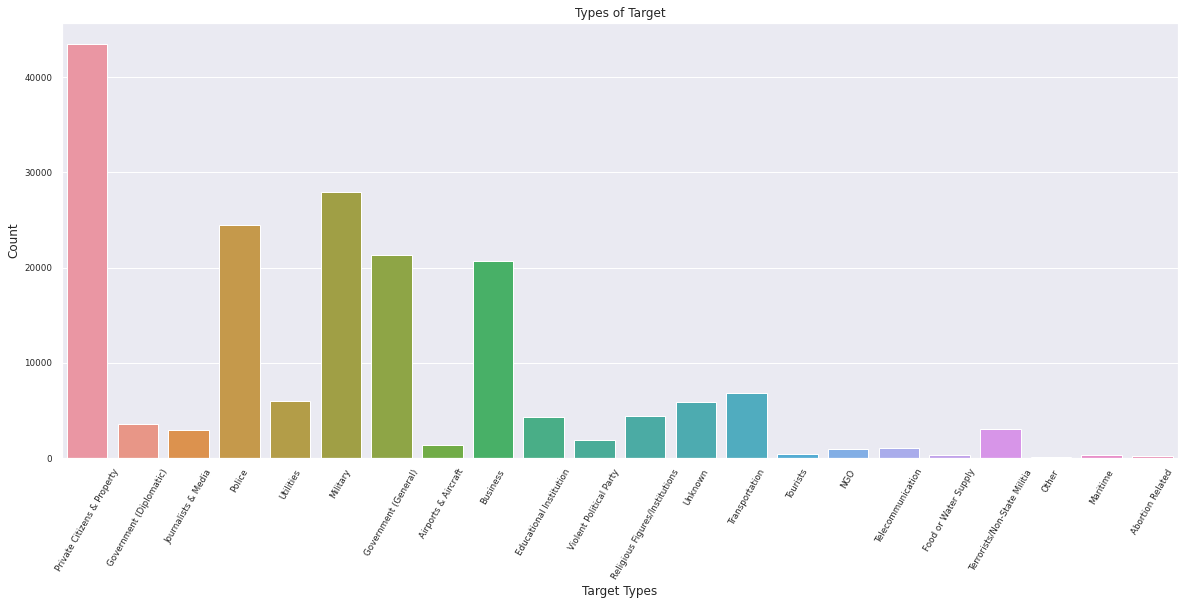

In [42]:
f = plt.figure(figsize=(20, 8))

sns.set(font_scale=0.8)
xaxis = sns.countplot(x='targettype', data=terror_df,)

xaxis.set_xticklabels(xaxis.get_xticklabels(), rotation=60)
plt.xlabel('Target Types', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Types of Target', fontsize=12)

Top 15 Contries with most number of Attacks by terror groups

Text(0.5, 1.0, 'Top 15 Countries: Most Attacks by Terrorist Groups')

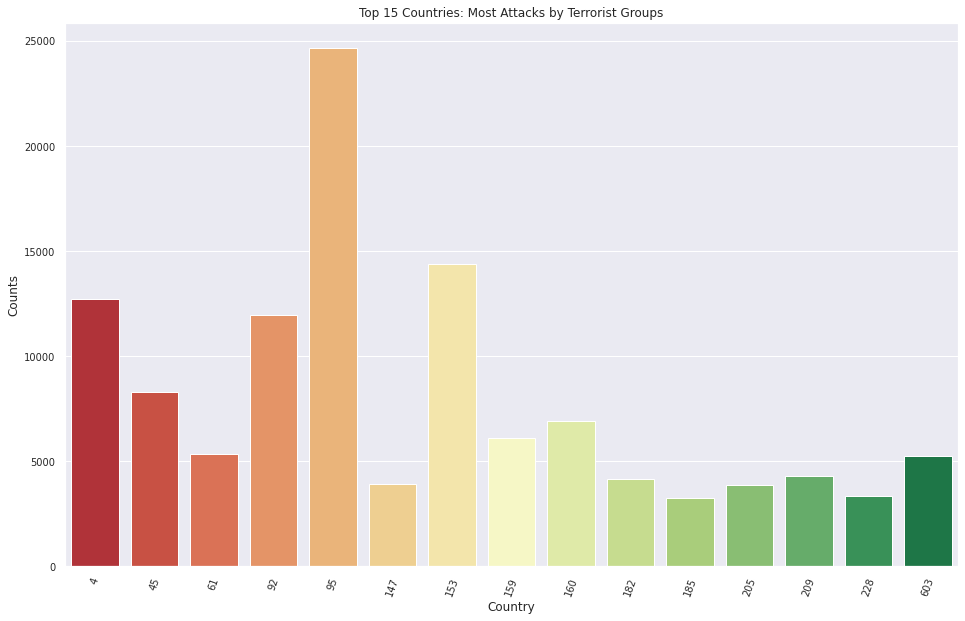

In [43]:
fig= plt.figure(figsize=(16, 10))
sns.set(font_scale=0.9)
terror_country = sns.barplot(x=terror_df['country'].value_counts()[0:15].index, y=terror_df['country'].value_counts()[0:15], palette='RdYlGn')
terror_country.set_xticklabels(terror_country.get_xticklabels(), rotation=70)
terror_country.set_xlabel('Country', fontsize=12)
terror_country.set_ylabel('Counts', fontsize=12)
plt.title('Top 15 Countries: Most Attacks by Terrorist Groups', fontsize=12)

Analysis of number of attacks in a region on a particular calender year

This helps us compare the rise / fall of attacks on a region

In [44]:
region_year = pd.crosstab(terror_df.year, terror_df.region)

region_year.head(20)

region,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1970,472,7,65,2,10,1,0,50,12,28,3,1
1971,247,5,24,1,6,0,0,125,5,55,2,1
1972,73,3,33,0,16,1,0,376,1,53,4,8
1973,64,6,83,2,2,1,0,290,1,19,4,1
1974,111,11,81,4,3,2,0,317,2,42,7,1
1975,159,9,55,12,7,4,0,438,0,44,12,0
1976,125,45,91,2,12,4,0,578,0,55,11,0
1977,149,24,119,4,8,2,0,771,2,211,29,0
1978,117,199,222,35,44,2,0,729,2,128,46,2


Text(0.5, 1.0, 'Number of Attacks per Region by Year')

<Figure size 1152x720 with 0 Axes>

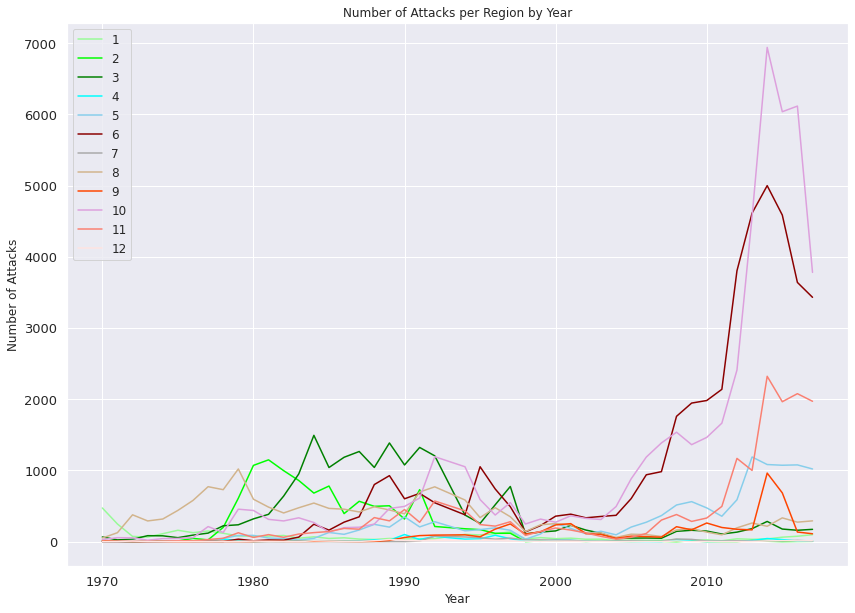

In [45]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
region_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Number of Attacks per Region by Year', fontsize=12)

Analysis of number of attacks of a particular type on a particular calender year

This helps us compare the rise / fall of attack types over the years

In [46]:
attacktype_year = pd.crosstab(terror_df.year, terror_df.attacktype)

attacktype_year.head(20)

attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
year,,,,,,,,,
1970,61,22,333,174,11,3,38,3,6
1971,44,70,239,88,6,1,20,0,3
1972,63,265,188,19,12,4,16,0,1
1973,62,164,149,36,8,7,43,3,1
1974,46,158,285,42,3,5,37,4,1
1975,81,181,370,64,1,13,27,0,3
1976,124,204,419,113,4,6,45,3,5
1977,255,146,635,182,7,13,67,0,14
1978,241,263,644,181,0,43,97,5,52


Analysis of number of attacks using a particular class of weapons on a particular calender year

This helps us compare the rise / fall of preferred weapon types for attacks

Text(0.5, 1.0, 'Weapon trends by Year')

<Figure size 1152x720 with 0 Axes>

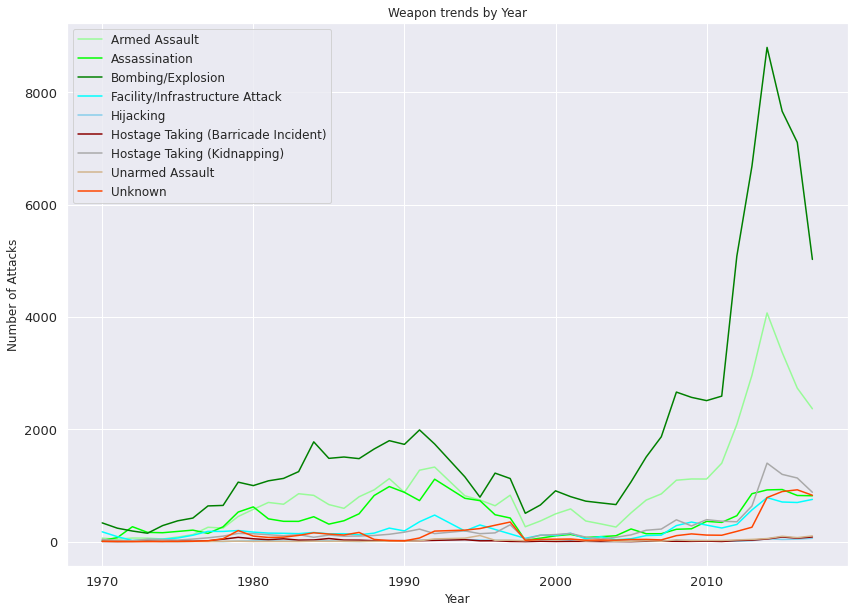

In [47]:
fig = plt.figure(figsize=(16, 10))

color_list_reg_yr = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 
                    'orangered', 'plum', 'salmon', 'mistyrose']
attacktype_year.plot(figsize=(14, 10), fontsize=13, color=color_list_reg_yr)
#region_year.plot(figsize=(14, 10), fontsize=13)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.legend(fontsize=12)
plt.title('Weapon trends by Year', fontsize=12)

In [48]:
organisation_year = pd.crosstab(terror_df.year, terror_df.organisation)

organisation_year.head(20)

organisation,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,...,Zimbabwe People's Army (ZIPA),Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia
year,,,,,,,,,,,,,,,,,,,,,
1970,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
1971,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1978,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## **For Additional Analysis insights, refer to**
## **[Tableau Public Workbook on Exploratory Data Analysis-Global Terrorism](https://public.tableau.com/app/profile/shashwat.dev)**